# Assignment 1 : SMS Spam Classification
# Rishika Tibrewal, MDS202135

## Importing Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import  classification_report, confusion_matrix,accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB

## Loading training, validation, test data

In [2]:
train=pd.read_csv("Training Data.csv")
val=pd.read_csv("Validation Data.csv")
test=pd.read_csv("Test Data.csv")

In [3]:
train.head()

,Message,Label
0,send yetty number pls,0
1,1 000 cash 2 000 prize claim call09050000327,1
2,hey babe going ever figure going new year,0
3,let use next week princess,0
4,nice talking please dont forget pix want see,0


In [4]:
val.head()

,Message,Label
0,da happy sit together na,0
1,2nd attempt contract u week top prize either 1...,1
2,text carlos let know hang,0
3,shant disturb u anymore jia,0
4,hello u u 2 u b moving flat co need arrange pi...,0


In [5]:
test.head()

,Message,Label
0,watching tv lor funny bluff 4 wat izzit thk im...,0
1,well done 4 costa del sol holiday 5000 await c...,1
2,sm ac sptv new jersey devil detroit red wing p...,1
3,love working home,0
4,get ready put excellent sub face,0


In [6]:
y_train,X_train=train["Label"],train["Message"]
y_val,X_val=val["Label"],val["Message"]
y_test,X_test=test["Label"],test["Message"]

## Converting string to vectors, to give as input to the models

In [7]:
# replacing NAN entries by empty string
X_train = X_train.replace(np.nan, '', regex=True)
X_val = X_val.replace(np.nan, '', regex=True)
X_test = X_test.replace(np.nan, '', regex=True)

In [8]:
vector = CountVectorizer().fit(X_train)
X_train_vec=vector.transform(X_train)
X_val_vec=vector.transform(X_val)
X_test_vec=vector.transform(X_test)

In [9]:
len(vector.vocabulary_)

6778

In [10]:
X_train_vec.shape

(4025, 6778)

In [11]:
X_train_vec.nnz

34235

In [12]:
# Sparsity %
X_train_vec.nnz*100/(X_train_vec.shape[0]*X_train_vec.shape[1])

0.1254881980246651

In [13]:
X_val_vec.shape

(711, 6778)

In [14]:
X_val_vec.nnz

5517

In [15]:
# Sparsity %
X_val_vec.nnz*100/(X_val_vec.shape[0]*X_val_vec.shape[1])

0.11448057938751956

In [16]:
X_test_vec.shape

(836, 6778)

In [17]:
X_test_vec.nnz

5946

In [18]:
# Sparsity %
X_test_vec.nnz*100/(X_test_vec.shape[0]*X_test_vec.shape[1])

0.10493420170238359

In [19]:
tfidf_transformer = TfidfTransformer()
tfidf_train = tfidf_transformer.fit_transform(X_train_vec)
tfidf_val = tfidf_transformer.fit_transform(X_val_vec)
tfidf_test = tfidf_transformer.fit_transform(X_test_vec)

In [20]:
tfidf_train.shape,tfidf_val.shape,tfidf_test.shape

((4025, 6778), (711, 6778), (836, 6778))

## Training Models

# Multinomial Naive Bayes

In [21]:
mnb = MultinomialNB()
mnb.fit(tfidf_train,y_train)
y_pred = mnb.predict(tfidf_train)
print("Accuracy=",accuracy_score(y_train, y_pred)*100,"%")

Accuracy= 98.16149068322981 %


In [22]:
for i in np.arange(0.25, 2.25, 0.25):
    mnb = MultinomialNB(alpha=i).fit(tfidf_train, y_train)
    y_pred = mnb.predict(tfidf_val)
    print("Accuracy=",accuracy_score(y_val, y_pred)*100,"%\n", classification_report(y_val, y_pred))

Accuracy= 98.31223628691983 %
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       614
           1       1.00      0.88      0.93        97

    accuracy                           0.98       711
   macro avg       0.99      0.94      0.96       711
weighted avg       0.98      0.98      0.98       711

Accuracy= 97.8902953586498 %
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       614
           1       1.00      0.85      0.92        97

    accuracy                           0.98       711
   macro avg       0.99      0.92      0.95       711
weighted avg       0.98      0.98      0.98       711

Accuracy= 97.32770745428974 %
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       614
           1       1.00      0.80      0.89        97

    accuracy                           0.97       711
   macro avg       0.98      0.90   

alpha=0.25 maximises the recall and accuracy

In [23]:
mnb = MultinomialNB(alpha=0.25).fit(tfidf_train, y_train)
y_pred = mnb.predict(tfidf_train)
print("Accuracy=",accuracy_score(y_train, y_pred)*100,"%\n", classification_report(y_train, y_pred))

Accuracy= 99.6024844720497 %
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3479
           1       1.00      0.97      0.99       546

    accuracy                           1.00      4025
   macro avg       1.00      0.99      0.99      4025
weighted avg       1.00      1.00      1.00      4025



In [24]:
y_pred = mnb.predict(tfidf_test)
print("Accuracy=",accuracy_score(y_test, y_pred)*100,"%\n", classification_report(y_test, y_pred))

Accuracy= 97.84688995215312 %
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       732
           1       0.96      0.87      0.91       104

    accuracy                           0.98       836
   macro avg       0.97      0.93      0.95       836
weighted avg       0.98      0.98      0.98       836



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


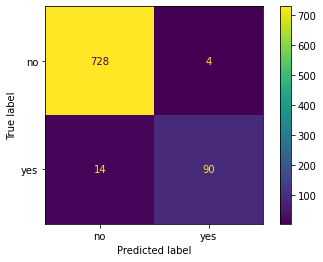

In [25]:
plot_confusion_matrix(mnb ,tfidf_test,y_test,display_labels=['no','yes'])

# SVM

In [26]:
clf = SVC(C=1)
clf.fit(tfidf_train,y_train)
y_pred = clf.predict(tfidf_train)
print("Accuracy=",accuracy_score(y_train, y_pred)*100,"%")

Accuracy= 99.77639751552795 %


In [27]:
for i in range(1,2000,100):
    clf = SVC(C=i)
    clf.fit(tfidf_train, y_train)
    y_pred = clf.predict(tfidf_val)
    print("Accuracy=",accuracy_score(y_val, y_pred)*100,"%\n", classification_report(y_val, y_pred))

Accuracy= 98.31223628691983 %
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       614
           1       1.00      0.88      0.93        97

    accuracy                           0.98       711
   macro avg       0.99      0.94      0.96       711
weighted avg       0.98      0.98      0.98       711

Accuracy= 98.59353023909986 %
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       614
           1       1.00      0.90      0.95        97

    accuracy                           0.99       711
   macro avg       0.99      0.95      0.97       711
weighted avg       0.99      0.99      0.99       711

Accuracy= 98.59353023909986 %
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       614
           1       1.00      0.90      0.95        97

    accuracy                           0.99       711
   macro avg       0.99      0.95  

C=200 maximises recall and accuracy

In [28]:
clf =SVC(C=200).fit(tfidf_train, y_train)
y_pred = clf.predict(tfidf_train)
print("Accuracy=",accuracy_score(y_train, y_pred)*100,"%\n", classification_report(y_train, y_pred))

Accuracy= 100.0 %
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3479
           1       1.00      1.00      1.00       546

    accuracy                           1.00      4025
   macro avg       1.00      1.00      1.00      4025
weighted avg       1.00      1.00      1.00      4025



In [29]:
y_pred = clf.predict(tfidf_test)
print("Accuracy=",accuracy_score(y_test, y_pred)*100,"%\n", classification_report(y_test, y_pred))

Accuracy= 97.96650717703349 %
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       732
           1       0.98      0.86      0.91       104

    accuracy                           0.98       836
   macro avg       0.98      0.93      0.95       836
weighted avg       0.98      0.98      0.98       836



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


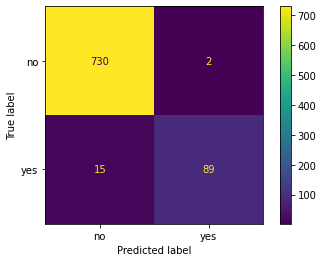

In [30]:
plot_confusion_matrix(clf ,tfidf_test,y_test,display_labels=['no','yes'])

# MLP Classifier

In [31]:
mlp=MLPClassifier()
mlp.fit(tfidf_train, y_train)
y_pred = mlp.predict(tfidf_train)
print(accuracy_score(y_train, y_pred)*100, '\n', classification_report(y_train, y_pred))

100.0 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3479
           1       1.00      1.00      1.00       546

    accuracy                           1.00      4025
   macro avg       1.00      1.00      1.00      4025
weighted avg       1.00      1.00      1.00      4025



In [32]:
y_pred = mlp.predict(tfidf_val)
print("Accuracy=",accuracy_score(y_val, y_pred)*100,"%\n", classification_report(y_val, y_pred))

Accuracy= 98.59353023909986 %
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       614
           1       0.99      0.91      0.95        97

    accuracy                           0.99       711
   macro avg       0.99      0.95      0.97       711
weighted avg       0.99      0.99      0.99       711



In [33]:
y_pred = mlp.predict(tfidf_test)
print("Accuracy=",accuracy_score(y_test, y_pred)*100,"%\n", classification_report(y_test, y_pred))

Accuracy= 98.68421052631578 %
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       732
           1       0.99      0.90      0.94       104

    accuracy                           0.99       836
   macro avg       0.99      0.95      0.97       836
weighted avg       0.99      0.99      0.99       836



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


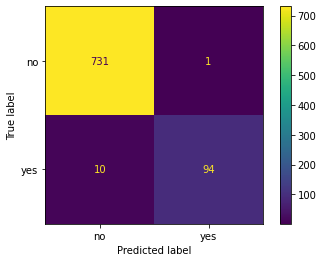

In [34]:
plot_confusion_matrix(mlp ,tfidf_test,y_test,display_labels=['no','yes'])

Since our aim is to reduce FN, hence increasing recall, MLP classifier suits best, according to accuracy as well as recall criteria.